In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import matplotlib as mpl

from pywaffle import Waffle

from highlight_text import fig_text

In [2]:
# 7 for home team, 14 or enemy team
df_touches = pd.read_html("https://fbref.com/en/matches/60801f11/Roma-Hellas-Verona-January-31-2021-Serie-A")[7]

In [3]:
df_touches.columns = df_touches.columns.droplevel()

In [4]:
df_touches1 = df_touches.iloc[:,:1]

In [5]:
df_touches2 = df_touches.iloc[:,6:12]

In [6]:
df_touches = pd.concat([df_touches1, df_touches2], axis=1)

In [7]:
df_touches = df_touches.sort_values(by=['Touches'], ascending=False)

In [8]:
length = len(df_touches)-1

In [9]:
df_touches = df_touches.drop(length)

In [10]:
df_touches = df_touches.drop('Touches', axis=1)

In [12]:
df_touches["Def 3rd"] = df_touches["Def 3rd"]-df_touches["Def Pen"]
df_touches["Att 3rd"] = df_touches["Att 3rd"]-df_touches["Att Pen"]

In [13]:
df_touches = df_touches.T

In [14]:
df_touches

,8,3,14,11,2,4,6,13,15,9,0,7,12,5,1,10
Player,Leonardo Spinazzola,Lorenzo Pellegrini,Gianluca Mancini,Roger Ibanez,Henrikh Mkhitaryan,Jordan Veretout,Gonzalo Villar,Marash Kumbulla,Pau López,Rick Karsdorp,Borja Mayoral,Bryan Cristante,Chris Smalling,Amadou Diawara,Bruno Peres,Carles Pérez
Def Pen,3,2,4,15,0,2,1,4,40,5,1,1,3,0,0,0
Def 3rd,21,11,21,24,6,5,12,24,7,13,2,5,6,0,0,0
Mid 3rd,32,37,32,19,28,30,33,23,0,21,21,12,3,5,4,1
Att 3rd,15,21,5,0,14,15,3,1,0,6,12,1,0,0,1,2
Att Pen,5,0,2,0,8,3,1,0,0,0,6,0,0,0,0,0


In [15]:
df_touches.columns = df_touches.iloc[0]
df_touches = df_touches.drop("Player")

In [16]:
df_touches

Player,Leonardo Spinazzola,Lorenzo Pellegrini,Gianluca Mancini,Roger Ibanez,Henrikh Mkhitaryan,Jordan Veretout,Gonzalo Villar,Marash Kumbulla,Pau López,Rick Karsdorp,Borja Mayoral,Bryan Cristante,Chris Smalling,Amadou Diawara,Bruno Peres,Carles Pérez
Def Pen,3,2,4,15,0,2,1,4,40,5,1,1,3,0,0,0
Def 3rd,21,11,21,24,6,5,12,24,7,13,2,5,6,0,0,0
Mid 3rd,32,37,32,19,28,30,33,23,0,21,21,12,3,5,4,1
Att 3rd,15,21,5,0,14,15,3,1,0,6,12,1,0,0,1,2
Att Pen,5,0,2,0,8,3,1,0,0,0,6,0,0,0,0,0


In [17]:
my_list = df_touches.columns.values.tolist()

In [18]:
df = pd.DataFrame(df_touches, columns=my_list)

In [19]:
df

,Leonardo Spinazzola,Lorenzo Pellegrini,Gianluca Mancini,Roger Ibanez,Henrikh Mkhitaryan,Jordan Veretout,Gonzalo Villar,Marash Kumbulla,Pau López,Rick Karsdorp,Borja Mayoral,Bryan Cristante,Chris Smalling,Amadou Diawara,Bruno Peres,Carles Pérez
Def Pen,3,2,4,15,0,2,1,4,40,5,1,1,3,0,0,0
Def 3rd,21,11,21,24,6,5,12,24,7,13,2,5,6,0,0,0
Mid 3rd,32,37,32,19,28,30,33,23,0,21,21,12,3,5,4,1
Att 3rd,15,21,5,0,14,15,3,1,0,6,12,1,0,0,1,2
Att Pen,5,0,2,0,8,3,1,0,0,0,6,0,0,0,0,0


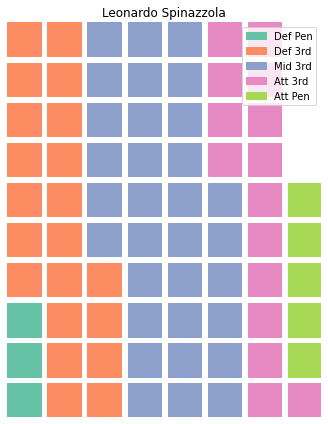

In [20]:
fig = plt.figure(
    FigureClass = Waffle,
    values = df.iloc[:,0],
    labels = list(df.index),
    rows = 10,
    title = {'label': my_list[0]},
    figsize = (6,6)
    )

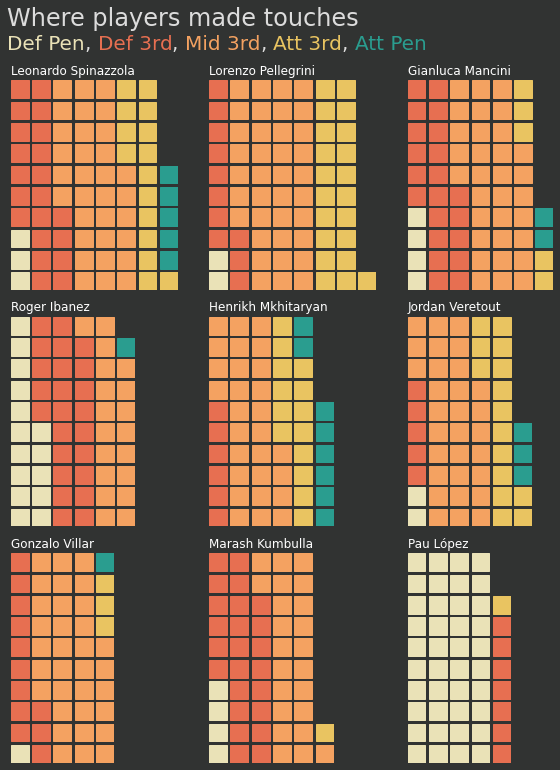

In [25]:
fig = plt.figure(
    FigureClass= Waffle,
    rows = 10,
    figsize = (10,10),
    plots = {
        '331': {
            'values': df.iloc[:,0],
            'title': {
                'label':my_list[0],
                'color':'white',
                'loc': 'left'
            }
        },
        '332': {
            'values': df.iloc[:,1],
            'title': {
                'label':my_list[1],
                'color':'white',
                'loc': 'left'
            }
        },
        '333': {
            'values': df.iloc[:,2],
            'title': {
                'label':my_list[2],
                'color':'white',
                'loc': 'left'
            }
        },
        '334': {
            'values': df.iloc[:,3],
            'title': {
                'label':my_list[3],
                'color':'white',
                'loc': 'left'
            }
        },
        '335': {
            'values': df.iloc[:,4],
            'title': {
                'label':my_list[4],
                'color':'white',
                'loc': 'left'
            }
        },
        '336': {
            'values': df.iloc[:,5],
            'title': {
                'label':my_list[5],
                'color':'white',
                'loc': 'left'
            }
        },
        '337': {
            'values': df.iloc[:,6],
            'title': {
                'label':my_list[6],
                'color':'white',
                'loc': 'left'
            }
        },
        '338': {
            'values': df.iloc[:,7],
            'title': {
                'label':my_list[7],
                'color':'white',
                'loc': 'left'
            }
        },
        '339': {
            'values': df.iloc[:,8],
            'title': {
                'label':my_list[8],
                'color':'white',
                'loc': 'left'
            }
        } 
    },
    colors = ('#eae2b7', '#e76f51', '#f4a261','#e9c461','#2a9d8f')
)

fig_text(s = 'Where players made touches \n',
         x = .01, y=.99,
         fontsize = 24,
         color = '#DCDCDC'
)
fig_text(s = '\n<Def Pen>, <Def 3rd>, <Mid 3rd>, <Att 3rd>, <Att Pen>',
         x = .01, y=1,
         fontsize = 20,
         color = '#DCDCDC',
         highlight_colors = ['#eae2b7', '#e76f51', '#f4a261','#e9c461','#2a9d8f']
)

fig.patch.set_facecolor('#313332')

In [22]:
# pd.read_html("https://fbref.com/en/matches/3c20c9a2/Barcelona-Sevilla-October-4-2020-La-Liga")[7]

In [23]:
# pd.read_html("https://fbref.com/en/matches/3c20c9a2/Barcelona-Sevilla-October-4-2020-La-Liga")[14]

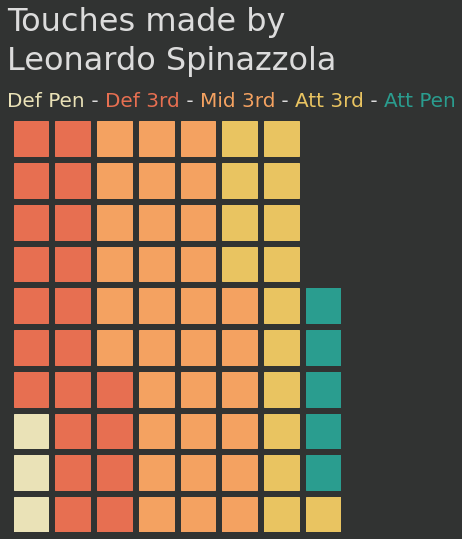

In [24]:
fig = plt.figure(
    FigureClass= Waffle,
    rows = 10,
    figsize = (6,6),
    plots = {
        '111': {
            'values': df.iloc[:,0],
#             'title': {
#                 'label':my_list[0] + "\n",
#                 'color':'#DCDCDC',
#                 'loc': 'left',
#                 'size':40
#             }
        }
    },
    colors = ('#eae2b7', '#e76f51', '#f4a261','#e9c461','#2a9d8f')
    
)
fig_text(s = 'Touches made by \n{}\n'.format(my_list[0]),
         x = .01, y=.99,
         fontsize = 32,
         color = '#DCDCDC'
)
fig_text(s = '\n<Def Pen> - <Def 3rd> - <Mid 3rd> - <Att 3rd> - <Att Pen>',
         x = .01, y=1,
         fontsize = 20,
         color = '#DCDCDC',
         highlight_colors = ['#eae2b7', '#e76f51', '#f4a261','#e9c461','#2a9d8f']
)




fig.patch.set_facecolor('#313332')